# p-value
In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide25.png)

# Key Formula

The p-value represents the probability of observing a test statistic at least as extreme as what was actually observed, assuming the null hypothesis is true.

$$
p\text{-value} = P(\text{Test Statistic is as extreme or more extreme than observed} | H_0 \text{ is true})
$$

# Technical Details

## Mathematical Definition

For a test statistic $T$ and observed value $t$:

$$
\begin{align}
p\text{-value} &= P(T \geq t | H_0) \quad \text{[right-tailed test]} \\
p\text{-value} &= P(T \leq t | H_0) \quad \text{[left-tailed test]} \\
p\text{-value} &= 2 \times P(T \geq |t| | H_0) \quad \text{[two-tailed test]}
\end{align}
$$

### Key Properties
1. **Monotonic Relationship**: Smaller p-values correspond to more extreme test statistics
2. **Significance Level**: We reject $H_0$ if $p\text{-value} \leq \alpha$

### Critical Limitation: Asymmetric Logic
**Important**: The null hypothesis $H_0$ can never be "accepted" or "proven true" - it can only be:
- **Rejected** (when $p\text{-value} \leq \alpha$): Strong evidence against $H_0$
- **Not rejected** (when $p\text{-value} > \alpha$): Insufficient evidence to reject $H_0$


## Connection to Bayesian Inference [Contrast with Bayesian Inference]

- In frequentist, "Not rejected" is not "accepted" or "true". Absence of evidence is not evidence of absence. P(H_1|D) --- confidence interval --- actually fail to reject H0
- Bayesian directly measure P(H_1|D)

- P-values are almost always reported in **summary statistics**, but it is not inference. They summarize how compatible the observed data is with $H_0$, but they don't directly provide probabilistic statements about hypotheses.
- In Bayesian inference, we actually can calculate the following directly:

    $$
    P(H_0 | \text{D}) = \frac{P(\text{D} | H_0) \cdot P(H_0)}{P(\text{D})}
    $$

    which is the probability of the $H_0$ being true (accept the null, rather than the probability of fail to reject the null (0.05) in frequentist). This is the false discovery rate (FDR), providing direct probabilistic interpretations that p-values cannot.

# Related Topics

- [OLS](https://gaow.github.io/statgen-prerequisites/ordinary_least_squares.html)
- [summary statistics](https://gaow.github.io/statgen-prerequisites/summary_statistics.html)
- [likelihood](https://gaow.github.io/statgen-prerequisites/likelihood.html)
- [Bayes factor](https://gaow.github.io/statgen-prerequisites/Bayes_factor.html)

# Example

You find a coin on the street and wonder: "Is this thing rigged?" So you flip it 10 times and get only 3 heads and 7 tails. Your gut says something's off, but how do you know if you're just unlucky or if the coin is actually biased?

This is exactly what p-values help us figure out. Instead of relying on gut feelings, we can ask: *If this coin were perfectly fair, how often would we see results this extreme (or more extreme) just by random chance?"*

## Setting Up Our Investigation

In [2]:
rm(list=ls())
# Our observed data
heads_observed <- 3
tails_observed <- 7
total_flips <- 10

# Our hypothesis
fair_coin_prob <- 0.5

cat("Observed: ", heads_observed, " heads out of ", total_flips, " flips\n")
cat("That's ", heads_observed/total_flips*100, "% heads\n")

Observed:  3  heads out of  10  flips
That's  30 % heads


## What Would a Fair Coin Actually Do?

Let's simulate what happens when we flip a fair coin 10 times, thousands of times over:

In [4]:
set.seed(29)  # For reproducible results
n_simulations <- 10000

# Simulate 10,000 experiments of flipping a fair coin 10 times
simulated_heads <- rbinom(n_simulations, size = total_flips, prob = fair_coin_prob)
cat("In our first 20 simulations, we got this many heads...")
head(simulated_heads, 20)


In our first 20 simulations, we got this many heads...

[1] 3 4 3 4 5 3 7 7 3 4 8 5 4 6 4 6 6 4 7 4

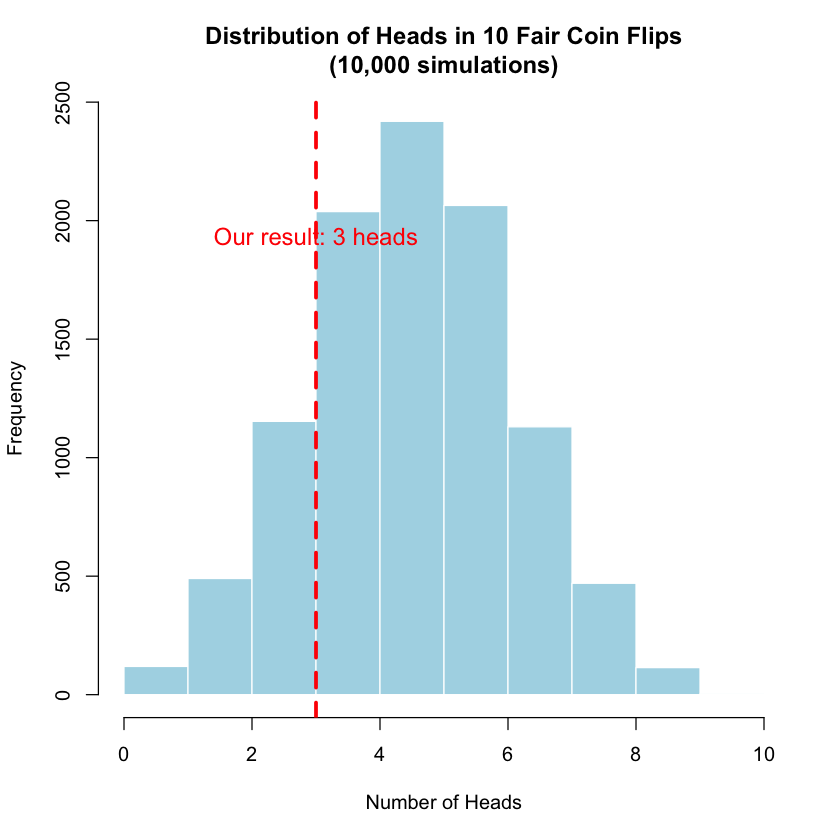

In [5]:
# Create a histogram to see the distribution
hist(simulated_heads, 
     breaks = 0:10, 
     main = "Distribution of Heads in 10 Fair Coin Flips\n(10,000 simulations)",
     xlab = "Number of Heads",
     ylab = "Frequency",
     col = "lightblue",
     border = "white")

# Mark our observed result
abline(v = heads_observed, col = "red", lwd = 3, lty = 2)
text(heads_observed, max(table(simulated_heads)) * 0.8, 
     paste("Our result:", heads_observed, "heads"), 
     col = "red", cex = 1.2)


## The Key Question: How Extreme Is Our Result?

Now here's the crucial insight: we want to know how often a fair coin would give us results **as extreme or more extreme** than what we observed.

Since we got 3 heads (which is below the expected 5), "more extreme" means getting 3 or fewer heads, OR getting 7 or more heads (the mirror image).


In [6]:
# Calculate p-value the simulation way
extreme_low <- sum(simulated_heads <= heads_observed)
extreme_high <- sum(simulated_heads >= (total_flips - heads_observed))
total_extreme <- extreme_low + extreme_high

p_value_simulated <- total_extreme / n_simulations

cat("Out of", n_simulations, "simulations:\n")
cat("- Got", heads_observed, "or fewer heads:", extreme_low, "times\n")
cat("- Got", total_flips - heads_observed, "or more heads:", extreme_high, "times\n")
cat("- Total extreme results:", total_extreme, "\n")
cat("- P-value (simulated):", round(p_value_simulated, 4), "\n")

Out of 10000 simulations:
- Got 3 or fewer heads: 1762 times
- Got 7 or more heads: 1717 times
- Total extreme results: 3479 
- P-value (simulated): 0.3479 


## The "Exact" Mathematical Answer

We can also calculate this precisely using the binomial distribution:


In [7]:
# Calculate the exact p-value
p_value_exact <- 2 * pbinom(heads_observed, size = total_flips, prob = fair_coin_prob)

cat("Exact p-value:", round(p_value_exact, 4), "\n")
cat("Simulated p-value:", round(p_value_simulated, 4), "\n")
cat("Difference:", abs(p_value_exact - p_value_simulated), "\n")


Exact p-value: 0.3438 
Simulated p-value: 0.3479 
Difference: 0.00415 


## What Does This P-value Actually Mean?

**Our p-value ≈ 0.34** means:

> "If the coin were truly fair, we'd see results this extreme (3 or fewer heads, or 7 or more heads) about 34% of the time just by random chance."

In other words:
- **NOT rare at all!** Getting 3 heads out of 10 flips happens pretty often with fair coins
- **We can't conclude the coin is biased** - this result is totally consistent with a fair coin having a bad luck streak
- **We fail to reject the null hypothesis** that the coin is fair


# Supplementary

- [Connection between Bayes factor and p-value](https://stephens999.github.io/fiveMinuteStats/BF_and_pvalue.html)
- [Example of difficulty of calibrating p values](https://stephens999.github.io/fiveMinuteStats/pvalue_difficult_calibrate_example.html)